In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [3]:
try:
    df = pd.read_csv('/Users/georgezagorsky/Downloads/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [385]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [386]:
def rename_columns(data : pd.DataFrame):
    columns_for_rename = {
        'cityCenters_nearest' : 'distance_to_centre',
        'balcony' : 'num_balcony',
        'rooms' : 'num_rooms',
        'studio' : 'is_studio',
        'locality_name' : 'city',
        'airports_nearest' : 'distance_to_ariport',
        'parks_around3000' : 'count_parks_around_3km',
        'ponds_nearest' : 'count_ponds_nearest',
        'ponds_around3000' : 'count_ponds_around_3km'
    }
    return pd.DataFrame(data).rename(columns = columns_for_rename)

df = rename_columns(df)
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,num_balcony,city,distance_to_ariport,distance_to_centre,count_parks_around_3km,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Столбцы где нужно поменять тип данных:
1) floors_total - заменить с типа float64 на int
2) is_apartment - заменить с типа object на тип boolean
3) balcony - c типа float на тип int
4) first_day_exposition object/datetime

In [387]:
# Начнем со столбца floors_total - мы не сможем просто так заменить его на тип int, потому что у нас есть пропущенные значения
# Поэтому давайте заменим все пропуски как df['floor'] - чтобы потом не было конфликтов с разницей
df.loc[df['floors_total'].isna(), 'floors_total'] = df.loc[df['floors_total'].isna(), 'floor']
df['floors_total'].isna().mean()
# Я выбрал такой вариант заполнения - можно было сделать еще двумя способами
# 1) Найти зависимость (если такая есть) точного этажа от максимального в существующих строках и пытаться делать предикт
# 2) Попробовать заполнить медианным значеинем, но в таком случае есть аномалии (уже проверил)

0.0

In [388]:
# теперь меняем тип данных
df['floors_total'] = df['floors_total'].astype('int')


In [389]:
# 2) is_apartment
df[df['is_apartment'] == True].head() # скорее всего все пропуски должны быть заменены на False - чтобы потом все преобразовать к типу Bool


,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,num_balcony,city,distance_to_ariport,distance_to_centre,count_parks_around_3km,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3,29.4,1,True,...,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3,40.0,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,NaN,6,58.3,5,True,...,20.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,NaN,9,NaN,1,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [390]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'] = df['is_apartment'].astype(bool)
# заменяем на булевые значения так как у нас по условию должно быть true/false

In [391]:
# 3) balcony 
df['num_balcony'].head() # скорее всего все пропуски это отсутствие балкона
df['num_balcony'] = df['num_balcony'].fillna(0)
df['num_balcony'] = df['num_balcony'].astype('int')

In [392]:
# 4) first_day_exposition
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])


In [393]:
# Проверим исправленные варианты
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images              23699 non-null int64
last_price                23699 non-null float64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
num_rooms                 23699 non-null int64
ceiling_height            14504 non-null float64
floors_total              23699 non-null int64
living_area               21796 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
is_studio                 23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              21421 non-null float64
num_balcony               23699 non-null int64
city                      23650 non-null object
distance_to_ariport       18157 non-null float64
distance_to_centre        18180 non-null float64
count_parks_around_3km    18181 non-null float64
parks_nearest         

In [394]:
df.sample(5) # прострим 5 случайных строк

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,num_balcony,city,distance_to_ariport,distance_to_centre,count_parks_around_3km,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition
5007,8,2500000.0,34.0,2018-05-14,1,2.70,5,14.4,3,False,...,12.2,0,посёлок Шушары,18410.0,24211.0,0.0,NaN,0.0,NaN,135.0
11084,11,5400000.0,61.6,2018-01-11,2,3.05,4,32.8,1,False,...,8.4,0,Санкт-Петербург,42579.0,11277.0,1.0,197.0,0.0,NaN,NaN
20462,5,4870000.0,58.0,2017-02-04,2,3.00,5,28.8,5,False,...,8.5,0,Санкт-Петербург,7973.0,18149.0,1.0,497.0,0.0,NaN,588.0
23493,9,2580000.0,61.0,2017-09-11,4,2.60,5,45.0,2,False,...,5.5,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,182.0
8594,12,2400000.0,28.0,2018-09-12,1,2.90,6,16.1,3,False,...,5.2,2,посёлок городского типа Ульяновка,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [395]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'num_rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'num_balcony',
       'city', 'distance_to_ariport', 'distance_to_centre',
       'count_parks_around_3km', 'parks_nearest', 'count_ponds_around_3km',
       'count_ponds_nearest', 'days_exposition'],
      dtype='object')

In [396]:
 df.isna().mean() # рассмотрим те столбцы в которых пропущены значения

total_images              0.000000
last_price                0.000000
total_area                0.000000
first_day_exposition      0.000000
num_rooms                 0.000000
ceiling_height            0.387991
floors_total              0.000000
living_area               0.080299
floor                     0.000000
is_apartment              0.000000
is_studio                 0.000000
open_plan                 0.000000
kitchen_area              0.096122
num_balcony               0.000000
city                      0.002068
distance_to_ariport       0.233850
distance_to_centre        0.232879
count_parks_around_3km    0.232837
parks_nearest             0.659100
count_ponds_around_3km    0.232837
count_ponds_nearest       0.615596
days_exposition           0.134225
dtype: float64

На данный момент мы заполнили пропуски в основных столбцах - возможно далее будем делать дополнительные замены - при изучении столбцов - пока что этого должно хватить. Немного подитожим.

Столбцы где нужно поменять тип данных: 1) floors_total - заменить с типа float64 на int 2) is_apartment - заменить с типа object на тип boolean 3) balcony - c типа float на тип int 4) first_day_exposition object/datetime 


1. В первом случае мы меняем на тип int, потому что не может быть сумарное количество 7.5 этажей попутно меняя пустые значения медиану


2. Во втором случае меня с типа object на тип bool, потому что у нас очевидно что пределы подпоследовательности возможных ответов это True, False


3. Balcony - меняем все на тип float, смысл такой же как и в первом случае только здесь отсутсвие скорее всего означает 0 балконов


4. first_day_exposition - меняем с типа object на тип datetime - потому что нам даны явные даты



# Шаг 2

In [397]:
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,num_balcony,city,distance_to_ariport,distance_to_centre,count_parks_around_3km,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [398]:
df.isna().mean()

total_images              0.000000
last_price                0.000000
total_area                0.000000
first_day_exposition      0.000000
num_rooms                 0.000000
ceiling_height            0.387991
floors_total              0.000000
living_area               0.080299
floor                     0.000000
is_apartment              0.000000
is_studio                 0.000000
open_plan                 0.000000
kitchen_area              0.096122
num_balcony               0.000000
city                      0.002068
distance_to_ariport       0.233850
distance_to_centre        0.232879
count_parks_around_3km    0.232837
parks_nearest             0.659100
count_ponds_around_3km    0.232837
count_ponds_nearest       0.615596
days_exposition           0.134225
dtype: float64

In [399]:
df['square_meter'] = df['last_price'] / df['total_area']
df['day'] = df['first_day_exposition'].dt.day
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['living_total'] = df['living_area'] / df['total_area']
df['kitchen_total'] = df['kitchen_area'] / df['total_area']
df.head()
# создаем все нужные столбцы 

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.100629,24,7,2015,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000


## Шаг 4

In [400]:
def custom_hist(x : pd.Series):
    plt.figure()
    plt.hist(x, edgecolor = 'red')
    plt.grid()
    plt.xticks(rotation = 30) 
    
def describe_columns(df: pd.DataFrame, col: str):
    print(f'Пропуски: {sum(df[col].isna())}')
    print(f'Тип переменной: {df.dtypes[col]}')

### total_images

Пропуски: 0
Тип переменной: int64


count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

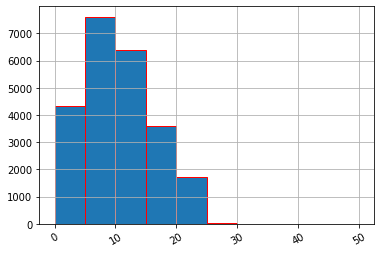

In [401]:
custom_hist(df['total_images'])
describe_columns(df, 'total_images')
df['total_images'].describe()
# Есть такой момент при котором у нас 0 изображений - вопрос в том стоит ли их убирать - давайте посчитаем их количество

In [402]:
len(df.loc[df['total_images'] == 0]) # 1059 таких строк - это оченб странно ведь кто будет брать квартиру без фотографий?
# учтем что наша задача заключается в том чтобы посмотреть явные распределения между факторами и ценой, так что не будем убирать такие строки

1059

### last_price

Пропуски: 0
Тип переменной: float64


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

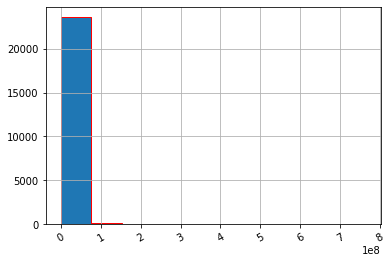

In [403]:
custom_hist(df['last_price'])
describe_columns(df, 'last_price')
df['last_price'].describe() # гистрограмма очень страная - давайте посмотрим на квантили


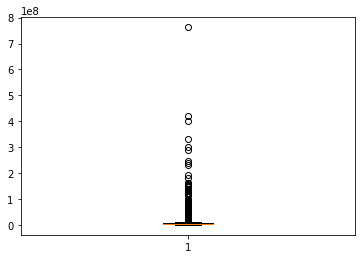

In [404]:
plt.boxplot(df['last_price']);

In [405]:
print(np.quantile(df['last_price'], 0.01))
print(np.quantile(df['last_price'], 0.99))

1000000.0
36000000.0


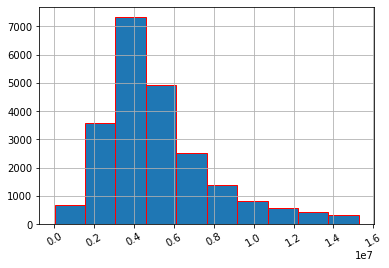

In [406]:
plot = df[df['last_price'] < np.quantile(df['last_price'], 0.95)]
custom_hist(plot['last_price']) # все равно еще не очень понятно - уменьшим квантиль

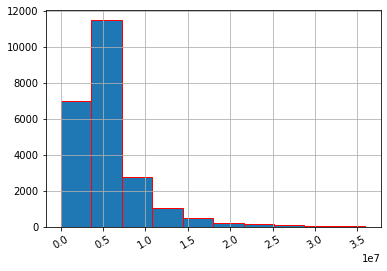

In [407]:
plot = df[df['last_price'] < np.quantile(df['last_price'], 0.99)]
custom_hist(plot['last_price']) # вот сейчас уже лучше 

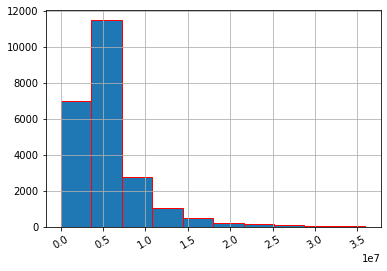

In [408]:
custom_hist(plot['last_price'])

In [409]:
# Вот теперь можно делать первый срез по данным
df = df[df['last_price'] < 1.5 * 10**7]
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,0.473684,0.299342


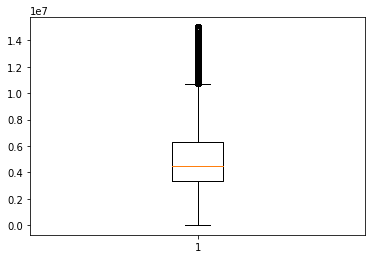

In [410]:
plt.boxplot(df['last_price']);

In [411]:
# У нас в дискрайбе было и слишком маленькое значения - давайте посмотрим на них
df[df['last_price'] < 100000] # у нас появилось 12 тысяч за квартиру в СБ - слишком мало 
# Можно было бы ее просто удалить, но я считаю что можно сделать немного иначе - давайте предположим
# Что это значение в тысячах и просто домножим его на еще 1 тысячу (10 ** 3)

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,805.0,0.0,NaN,8.0,111.834862,20,3,2019,0.293578,0.37156


In [412]:
df.loc[df['last_price'] < 100000, 'last_price'] = df.loc[df['last_price'] < 100000, 'last_price'] * 10 ** 3
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,0.473684,0.299342


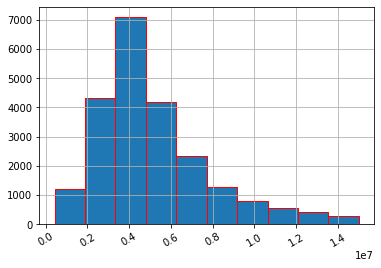

In [413]:
custom_hist(df['last_price']) # В принципе выглядит нормально - думаю смльнее нет особо смысла ограничивать

## total_area

Пропуски: 0
Тип переменной: float64


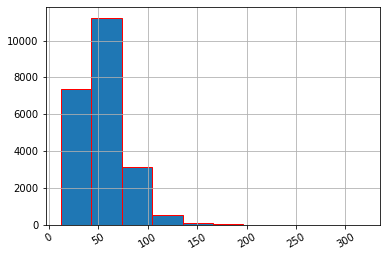

In [414]:
describe_columns(df, 'total_area')
custom_hist(df['total_area']) # в принципе все отлично - посмотрим на describe

In [415]:
df['total_area'].describe()

count    22454.000000
mean        55.121648
std         21.802867
min         12.000000
25%         39.400000
50%         50.105000
75%         65.675000
max        320.000000
Name: total_area, dtype: float64

Вот здесь уже появляются определеныне вопросы - 12кмМ? Слишком мало для квартир таких стоимостей. Открываем поисковик и смотрим средние площади квартир. Для однакомнатных квартир она составляет 28квМ. Для двухкомнатных порядка - 44, для трехкомнатных - 58, для четырехкомнатных - 70, для пятикомантных - 103. Исходя из этого и ограничим наш DF

In [416]:
df = df[df['total_area'] >= 28]
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,0.473684,0.299342


In [417]:
# поищем еще аномалии
df['delta_area'] = df['total_area'] - df['living_area'] - df['kitchen_area']
sum(df['delta_area'] < 0) # появились значения которые меньше нуля - избавимся

60

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb854360ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb893a65090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb854360a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb85437eb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb854377c90>],
 'means': []}

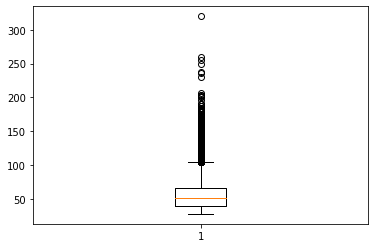

In [418]:
plt.boxplot(df['total_area']) # Также внимательно посмотрим на выбросы рассмторим те квартиры с площаью более 160

In [419]:
df[df['total_area'] > 160]

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total,delta_area
417,5,14200000.0,178.00,2017-10-26,5,3.30,4,126.6,2,False,...,3.0,257.0,104.0,79775.280899,26,10,2017,0.711236,0.108989,32.0
588,10,13900000.0,165.00,2016-05-03,5,NaN,5,114.0,4,False,...,1.0,723.0,45.0,84242.424242,3,5,2016,0.690909,0.078788,38.0
670,5,13700000.0,178.00,2017-08-08,4,2.77,16,125.0,4,False,...,1.0,914.0,112.0,76966.292135,8,8,2017,0.702247,0.089888,37.0
679,13,13700000.0,200.00,2017-09-27,4,2.90,4,90.0,1,False,...,1.0,234.0,172.0,68500.000000,27,9,2017,0.450000,0.175000,75.0
869,14,10335000.0,170.00,2017-09-11,5,3.00,16,81.0,11,False,...,0.0,NaN,35.0,60794.117647,11,9,2017,0.476471,NaN,NaN
1229,9,12990000.0,168.20,2018-07-14,5,3.20,5,110.8,2,False,...,1.0,1251.0,102.0,77229.488704,14,7,2018,0.658740,0.089774,42.3
2039,3,13520000.0,162.80,2018-03-21,7,3.00,4,121.6,4,False,...,3.0,153.0,NaN,83046.683047,21,3,2018,0.746929,0.097666,25.3
2462,18,7900000.0,201.50,2018-08-17,7,NaN,2,NaN,2,False,...,0.0,NaN,35.0,39205.955335,17,8,2018,NaN,NaN,NaN
2489,9,12500000.0,255.00,2017-04-21,3,NaN,2,153.9,2,False,...,3.0,198.0,102.0,49019.607843,21,4,2017,0.603529,0.394902,0.4
2756,1,13040000.0,196.00,2018-08-07,5,2.80,4,NaN,4,False,...,0.0,NaN,107.0,66530.612245,7,8,2018,NaN,NaN,NaN


Не вижу смысла выкидывать эти значения - я предлагаю просто для будущей ясности ограначить по 220

In [420]:
df = df[df['total_area'] < 220]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb885ae5850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb893e98c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb885ae59d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb885b00ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb885ae9d90>],
 'means': []}

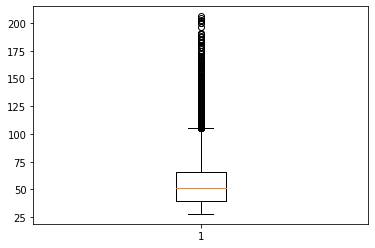

In [421]:
plt.boxplot(df['total_area']) # Отлично

In [422]:
df = df[df['delta_area'] > 0]
df = df.drop('delta_area', axis = 1)
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,0.473684,0.299342


В последнем варианте я нашел так называемый delta_area - то есть это разница между сумарной площадью площади кухни и жилого помещения

# num_rooms

Пропуски: 0
Тип переменной: int64


count    19701.000000
mean         2.007512
std          0.929355
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: num_rooms, dtype: float64

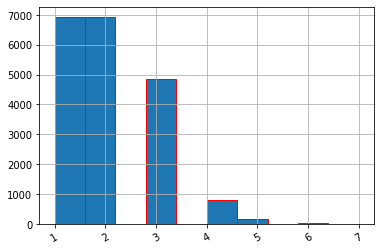

In [423]:
describe_columns(df, 'num_rooms')
custom_hist(df['num_rooms'])
df['num_rooms'].describe()

In [424]:
df[df['num_rooms'] > 5].head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
52,20,11795000.0,136.0,2017-09-22,6,3.00,2,94.0,2,False,...,526.0,0.0,NaN,NaN,86727.941176,22,9,2017,0.691176,0.080882
201,5,10880000.0,123.1,2015-11-12,6,3.20,5,89.0,2,False,...,516.0,0.0,NaN,992.0,88383.428107,12,11,2015,0.722989,0.089358
2017,1,9100000.0,111.0,2017-07-04,6,2.75,3,84.5,3,False,...,588.0,1.0,54.0,61.0,81981.981982,4,7,2017,0.761261,0.091892
2039,3,13520000.0,162.8,2018-03-21,7,3.00,4,121.6,4,False,...,360.0,3.0,153.0,NaN,83046.683047,21,3,2018,0.746929,0.097666
2139,8,12590000.0,140.9,2019-04-12,6,3.00,5,104.1,3,False,...,332.0,3.0,50.0,NaN,89354.151881,12,4,2019,0.738822,0.084457


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8960fc890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb8960e8f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8960fc410>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8960fd990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8960fde90>],
 'means': []}

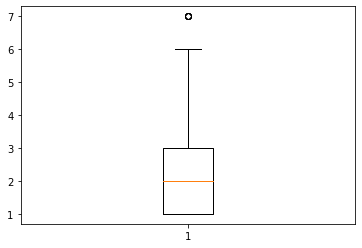

In [425]:
plt.boxplot(df['num_rooms']) # есть этот один выброс - давайте его уберем

In [426]:
df = df[df['num_rooms'] < 7]
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
6081,5,4700000.0,58.5,2018-10-09,3,3.15,5,39.3,4,False,...,303.0,0.0,NaN,161.0,80341.880342,9,10,2018,0.671795,0.158974
12785,10,3100000.0,32.0,2015-06-26,1,2.50,5,18.0,4,False,...,NaN,0.0,NaN,1054.0,96875.000000,26,6,2015,0.562500,0.171875
20986,6,5150000.0,54.0,2017-08-23,2,2.52,10,30.0,1,False,...,463.0,2.0,510.0,111.0,95370.370370,23,8,2017,0.555556,0.166667
17854,12,6850000.0,58.0,2016-06-14,2,2.80,5,38.0,4,False,...,385.0,0.0,NaN,864.0,118103.448276,14,6,2016,0.655172,0.129310
22341,11,6000000.0,57.5,2018-02-14,2,3.05,3,26.7,1,False,...,570.0,1.0,226.0,334.0,104347.826087,14,2,2018,0.464348,0.234783


# first_day_exposition

Пропуски: 0
Тип переменной: datetime64[ns]


(array([735599., 735780., 735964., 736146., 736330., 736511., 736695.,
        736876., 737060., 737241.]), <a list of 10 Text xticklabel objects>)

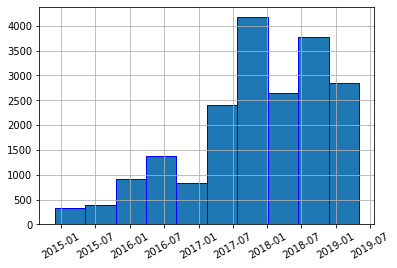

In [427]:
describe_columns(df, 'first_day_exposition')
plt.hist(df['first_day_exposition'], edgecolor = 'blue')
plt.grid()
plt.xticks(rotation = 30) 

# floor, total_floors

In [428]:
describe_columns(df, 'floor')
describe_columns(df, 'floors_total') # пропусков нет, так как мы убрали их заранее


Пропуски: 0
Тип переменной: int64
Пропуски: 0
Тип переменной: int64


Text(0.5, 1.0, 'Всего этажей')

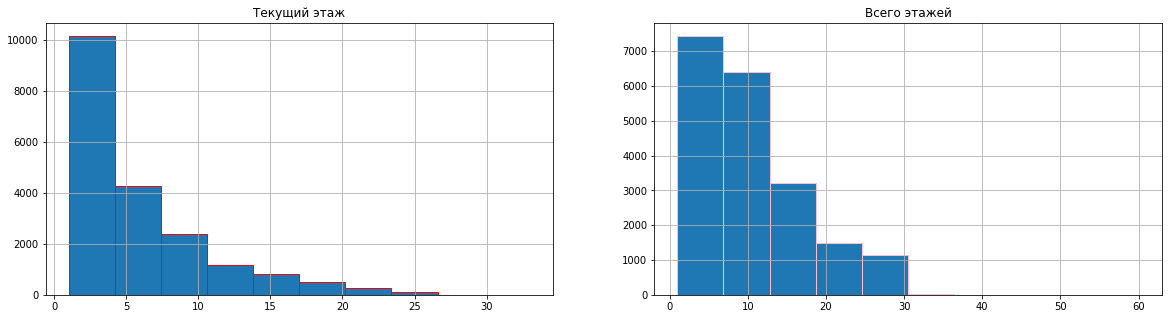

In [429]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.hist(df['floor'], edgecolor = 'red')
plt.grid()
plt.title('Текущий этаж')
plt.subplot(1, 2, 2)
plt.hist(df['floors_total'], edgecolor = 'pink')
plt.grid()
plt.title('Всего этажей')

(array([1.3362e+04, 4.2830e+03, 1.3670e+03, 5.6600e+02, 1.1100e+02,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <a list of 10 Patch objects>)

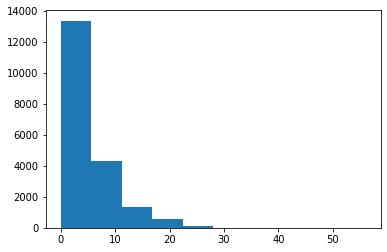

In [430]:
delta = df['floors_total'] - df['floor']
df[df['floors_total'] - df['floor'] < 0] # все отлично - отрицательных значений вроде бы нет
plt.hist(delta) # отрицательных значений нет


In [431]:
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.789474,10,9,2018,0.473684,0.299342


In [432]:
# этаж квартиры
df['group_floor'] = ['other'] * len(df)
df.loc[df['floor'] == 1, 'group_floor'] = 'first'
df.loc[df['floor'] == df['floors_total'], 'group_floor'] = 'last'
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,count_ponds_around_3km,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481,other
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277,first
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214,other
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000,other
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,55.0,95065.789474,10,9,2018,0.473684,0.299342,other


In [433]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'num_rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'num_balcony',
       'city', 'distance_to_ariport', 'distance_to_centre',
       'count_parks_around_3km', 'parks_nearest', 'count_ponds_around_3km',
       'count_ponds_nearest', 'days_exposition', 'square_meter', 'day',
       'month', 'year', 'living_total', 'kitchen_total', 'group_floor'],
      dtype='object')

# count_ponds_around_3km, count_parks_around_3km, distance_to_ariport, distance_to_centre

In [434]:
describe_columns(df, 'count_ponds_around_3km')
describe_columns(df, 'count_parks_around_3km')
describe_columns(df, 'distance_to_ariport')
describe_columns(df, 'distance_to_centre') # скорее всего все эти пропуски одинаковые - просто уберем эти строки

Пропуски: 4566
Тип переменной: float64
Пропуски: 4566
Тип переменной: float64
Пропуски: 4581
Тип переменной: float64
Пропуски: 4567
Тип переменной: float64


In [435]:
df['city'].value_counts().head(20)

Санкт-Петербург            12912
посёлок Мурино               395
посёлок Шушары               390
Всеволожск                   350
Колпино                      319
Пушкин                       317
посёлок Парголово            287
Гатчина                      285
деревня Кудрово              222
Петергоф                     186
Выборг                       185
Красное Село                 161
Сестрорецк                   160
Кудрово                      149
деревня Новое Девяткино      131
Сертолово                    130
Ломоносов                    123
Сланцы                        93
Тосно                         92
Волхов                        90
Name: city, dtype: int64

In [436]:
df['sm_city'] = np.zeros(len(df))
df.loc[(df['count_ponds_around_3km'].isna()) & (df['count_parks_around_3km'].isna()) & (df['distance_to_centre'].isna()), 'sm_city'] = 1

df = df[df['sm_city'] == 0]

In [437]:
describe_columns(df, 'count_ponds_around_3km')
describe_columns(df, 'count_parks_around_3km')
describe_columns(df, 'distance_to_ariport')
describe_columns(df, 'distance_to_centre') # все четко большинство пропусков теперь нет

Пропуски: 0
Тип переменной: float64
Пропуски: 0
Тип переменной: float64
Пропуски: 15
Тип переменной: float64
Пропуски: 1
Тип переменной: float64


In [438]:
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor,sm_city
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481,other,0.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277,first,0.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214,other,0.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000,other,0.0
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,False,...,NaN,155.0,99195.710456,2,11,2017,0.284182,0.386059,other,0.0


/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Дистанция до центра')

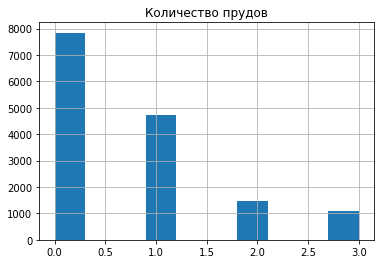

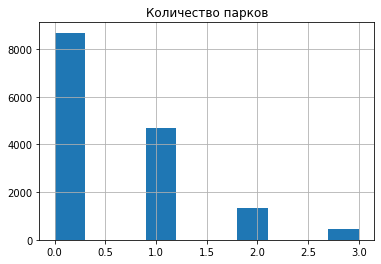

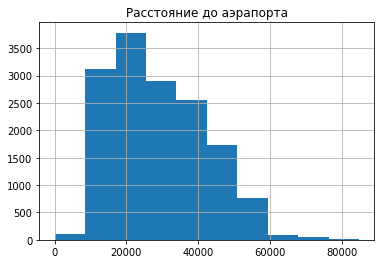

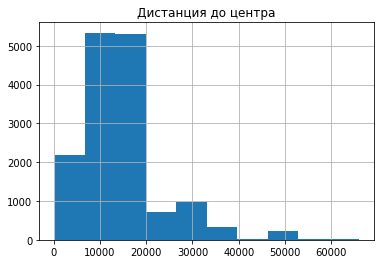

In [439]:
plt.figure()
plt.hist(df['count_ponds_around_3km'])
plt.grid()
plt.title('Количество прудов')

plt.figure()
plt.hist(df['count_parks_around_3km'])
plt.grid()
plt.title('Количество парков')

plt.figure()
plt.hist(df['distance_to_ariport'])
plt.grid()
plt.title('Расстояние до аэрапорта')

plt.figure()
plt.hist(df['distance_to_centre'])
plt.grid()
plt.title('Дистанция до центра')

In [440]:
df = df[df['distance_to_ariport'] != 0]
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor,sm_city
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481,other,0.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277,first,0.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214,other,0.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000,other,0.0
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,False,...,NaN,155.0,99195.710456,2,11,2017,0.284182,0.386059,other,0.0


# living area

Пропуски: 0
Тип переменной: float64


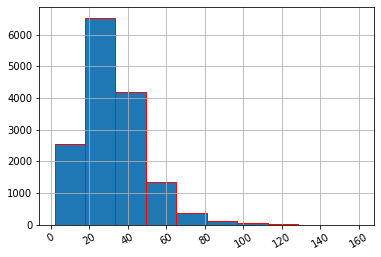

In [441]:
describe_columns(df, 'living_area')
custom_hist(df['living_area'])

In [442]:
df['living_area'].describe()
df[df['living_area'] > 100]

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor,sm_city
417,5,14200000.0,178.0,2017-10-26,5,3.30,4,126.6,2,False,...,257.0,104.0,79775.280899,26,10,2017,0.711236,0.108989,other,0.0
588,10,13900000.0,165.0,2016-05-03,5,NaN,5,114.0,4,False,...,723.0,45.0,84242.424242,3,5,2016,0.690909,0.078788,other,0.0
670,5,13700000.0,178.0,2017-08-08,4,2.77,16,125.0,4,False,...,914.0,112.0,76966.292135,8,8,2017,0.702247,0.089888,other,0.0
704,8,10600000.0,141.0,2015-12-17,4,2.90,5,107.0,3,False,...,NaN,240.0,75177.304965,17,12,2015,0.758865,0.141844,other,0.0
1067,14,12900000.0,158.6,2017-11-24,5,3.00,5,125.0,5,False,...,NaN,499.0,81336.696091,24,11,2017,0.788146,0.157629,last,0.0
1229,9,12990000.0,168.2,2018-07-14,5,3.20,5,110.8,2,False,...,1251.0,102.0,77229.488704,14,7,2018,0.658740,0.089774,other,0.0
2139,8,12590000.0,140.9,2019-04-12,6,3.00,5,104.1,3,False,...,50.0,NaN,89354.151881,12,4,2019,0.738822,0.084457,other,0.0
3119,3,13900000.0,178.0,2016-04-07,4,NaN,16,124.0,4,False,...,NaN,395.0,78089.887640,7,4,2016,0.696629,0.095506,other,0.0
3440,19,14980000.0,200.0,2018-10-17,4,2.90,4,102.2,2,False,...,802.0,61.0,74900.000000,17,10,2018,0.511000,0.060000,other,0.0
4853,2,11500000.0,149.0,2015-01-21,5,3.25,5,102.0,5,False,...,834.0,674.0,77181.208054,21,1,2015,0.684564,0.134228,last,0.0


In [443]:
df = df[df['living_area'] >= 14]

In [444]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'num_rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'num_balcony',
       'city', 'distance_to_ariport', 'distance_to_centre',
       'count_parks_around_3km', 'parks_nearest', 'count_ponds_around_3km',
       'count_ponds_nearest', 'days_exposition', 'square_meter', 'day',
       'month', 'year', 'living_total', 'kitchen_total', 'group_floor',
       'sm_city'],
      dtype='object')

# kitchen_area

Пропуски: 0
Тип переменной: float64


count    14952.000000
mean         9.992042
std          4.286394
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         64.000000
Name: kitchen_area, dtype: float64

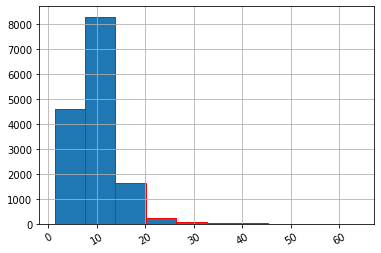

In [445]:
describe_columns(df, 'kitchen_area')
custom_hist(df['kitchen_area'])
df['kitchen_area'].describe()

In [446]:
df['kitchen_area'].describe()
dispercion = 4.28 ** 2
dispercion

18.3184

In [447]:
df = df[df['kitchen_area'] >= 5]
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor,sm_city
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481,other,0.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,81.0,82920.792079,4,12,2018,0.460396,0.272277,first,0.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,574.0,558.0,92785.714286,20,8,2015,0.612500,0.148214,other,0.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000,other,0.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,289.0,88524.590164,26,2,2017,0.714754,0.106557,other,0.0


# ceiling_height

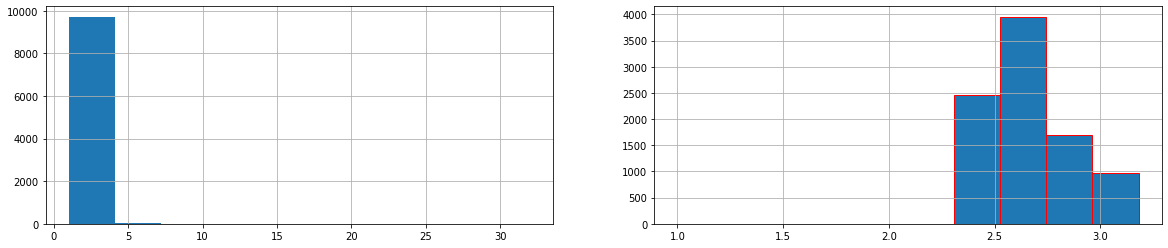

In [448]:
plt.figure(figsize = (20, 4))
plt.subplot(1, 2, 1)
plt.hist(df['ceiling_height'])
plt.grid()

thresh = np.nanquantile(df['ceiling_height'], 0.95)
plt.subplot(1, 2, 2)
plt.hist(df[df['ceiling_height'] < thresh]['ceiling_height'], edgecolor = 'red')
plt.grid()

In [449]:
df = df.loc[(df['ceiling_height'] >2.5)  & (df['ceiling_height'] < 10)] # замена явных аномалий

In [450]:
np.mean(df['ceiling_height'])

2.7861651276480175

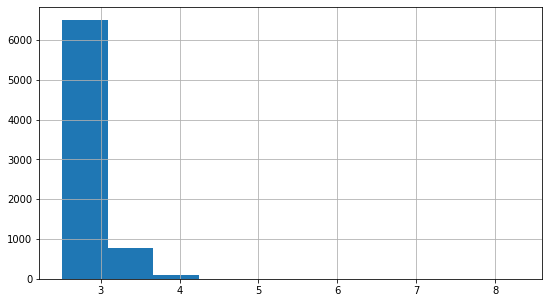

In [451]:
df['ceiling_height'].hist(figsize = (9, 5))

## Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?


In [452]:
df.columns
df.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor,sm_city
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,120370.370370,7,3,2019,0.472222,0.231481,other,0.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,19,6,2018,0.320000,0.410000,other,0.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,553.0,137.0,127525.252525,16,11,2017,0.512626,0.214646,other,0.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,298.0,366.0,82943.925234,1,7,2017,0.630841,0.121495,last,0.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,NaN,397.0,81707.317073,23,11,2017,0.678049,0.109756,first,0.0


In [453]:
df['days_exposition'].isna().sum() # не думаю что можно заменить пропуски просто медианным значением - поэтому попытаемся сделать выборку по 1 группе


1108

In [454]:
data_for_check = df[df['days_exposition'].notnull()].sample(20)
data_for_check['days_exposition']

9726      79.0
4220     123.0
3586      64.0
11299     27.0
870      222.0
12476    144.0
7721     400.0
17851    106.0
3216      15.0
12846    173.0
6966      60.0
6377     126.0
20533    336.0
4671      33.0
19361    154.0
17314    353.0
19854     23.0
9645      45.0
701      839.0
5545     327.0
Name: days_exposition, dtype: float64

In [455]:
data_for_check.head()

,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,count_ponds_nearest,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor,sm_city
9726,16,5850000.0,85.0,2017-11-27,3,2.80,17,53.0,16,False,...,NaN,79.0,68823.529412,27,11,2017,0.623529,0.200000,other,0.0
4220,17,4500000.0,45.0,2017-08-01,2,2.55,5,31.0,2,False,...,271.0,123.0,100000.000000,1,8,2017,0.688889,0.133333,other,0.0
3586,0,5450000.0,53.8,2018-02-01,2,2.85,2,36.5,2,False,...,NaN,64.0,101301.115242,1,2,2018,0.678439,0.098513,last,0.0
11299,7,5300000.0,39.0,2019-01-23,1,2.75,12,19.0,7,False,...,NaN,27.0,135897.435897,23,1,2019,0.487179,0.205128,other,0.0
870,11,5890000.0,65.0,2015-11-18,3,2.65,16,39.5,1,False,...,1199.0,222.0,90615.384615,18,11,2015,0.607692,0.165385,first,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb80039c490>,
      dtype=object)

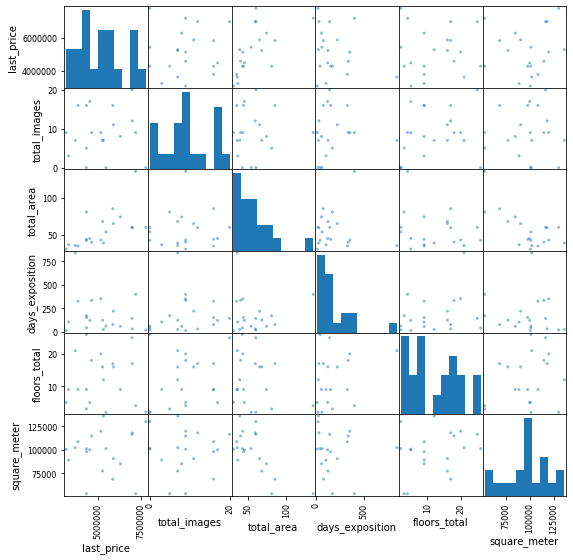

In [458]:
data_for_check = data_for_check[['last_price', 'total_images', 'total_area', 'days_exposition', 'floors_total', 'square_meter']]
pd.plotting.scatter_matrix(data_for_check, figsize = (9, 9))

Не вижу совсем никакой зависимости между days_exposion и всеми явными признаками - поэтому лучше оствить это идею и покрутить со средним и медианой

In [461]:
df['days_exposition'].describe()

count    6256.000000
mean      193.463395
std       231.740475
min         2.000000
25%        45.000000
50%       107.000000
75%       250.000000
max      1553.000000
Name: days_exposition, dtype: float64

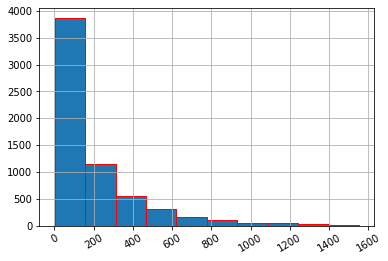

In [467]:
custom_hist(df['days_exposition'])

Есть явные квартиры время продажи который превышает в 800 или даже тысячу дней. Давайте посмотрим на них

In [475]:
df[df['days_exposition'] > 800].groupby('year').agg({'floors_total' : 'count'})

,floors_total
year,
2014,16
2015,130
2016,61
2017,1


С точки зрения реальной задачи я бы просто выкинул те квартиры с 2014/2016 год - но если нам нужно дать оценку долгой и медленной продажи, то я постараюсь вывести среднее от среднего. Давайте еще раз взглянем на гистограмму

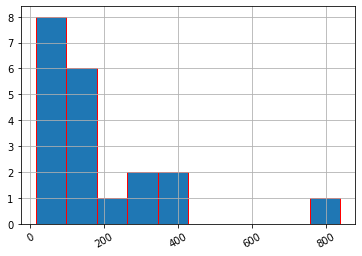

In [519]:
custom_hist(data_for_check['days_exposition'])

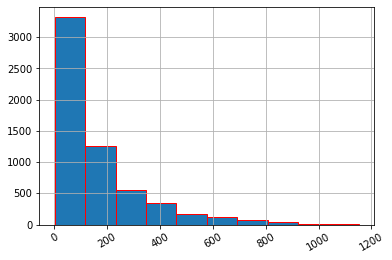

In [525]:
custom_hist(df[df['days_exposition'].notnull()]['days_exposition'])

Если взглянуть на гистограмму - то мы можем сделать большое количество выводов. У нас ассимитричное распределение с явной одной модой - но стоит ли ее брать как за основу? На мой взгляд нет и я попытаюсь прибегнуть к среднему. Так как есть теорема утвреждающая что при нормальном распределении у нас средние от группировки от среднего будут давать само среднее. То мы сделаем тоже самое и для асиметричного распределения, но уберем выбросы которые свыше 800 дней продажи. Они нас интересуют - ибо они там исказят результаты

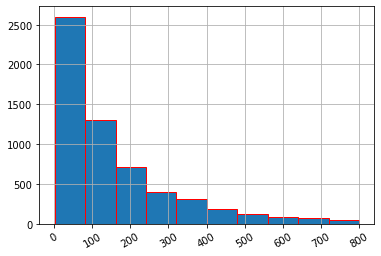

In [539]:
data = df[df['days_exposition'].notnull()]
data = data[data['days_exposition'] < 800]
custom_hist(data['days_exposition']) # уже лучше - можно начинать находить среднее от групп

In [546]:
stack =[]
counter = 20
for index in range(0, len(data), 20):
    new_df = data[index:counter]
    counter += 20
    stack.append(np.mean(new_df['days_exposition']))

result_mean = sum(stack) / len(stack)
result_mean

152.38162100456626

In [549]:
data['days_exposition'].describe() # Теорема совпала идеально - теперь я без проблем могу использовать это среднее как основу

count    5835.000000
mean      152.356470
std       157.763427
min         2.000000
25%        41.000000
50%        95.000000
75%       206.000000
max       799.000000
Name: days_exposition, dtype: float64

In [551]:
np.median(data['days_exposition'])

95.0

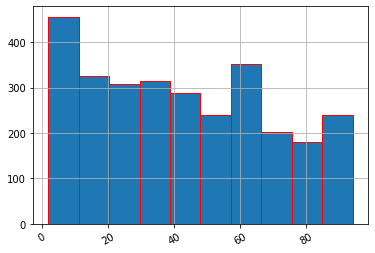

In [560]:
custom_hist(data[data['days_exposition'] < 95]['days_exposition'])

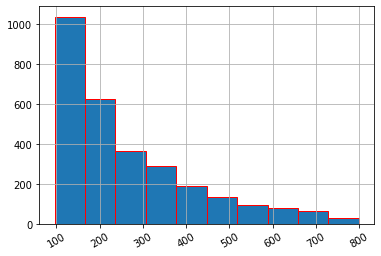

In [561]:
custom_hist(data[data['days_exposition'] > 95]['days_exposition'])

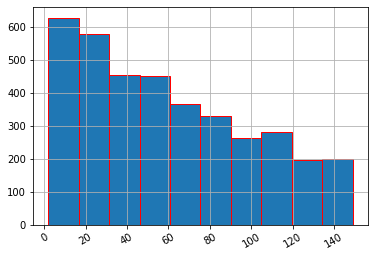

In [562]:
custom_hist(data[data['days_exposition'] < 150]['days_exposition'])

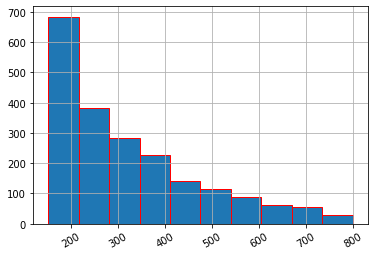

In [564]:
custom_hist(data[data['days_exposition'] > 150]['days_exposition'])

Я буду считать что значения меньше медианного это необычно быстрая продажа - значения между средним и самым долгим - это необычное долгая продажа, а между медианой и средним будет среднее время продажи. На мой взгляд такая категоризация является лучшей, потому что среднее и медиана имеет разницу в 2 месяца - то есть фактически мы можем предполагать что между этими двумя значениями скрывается то самое среднее для нас. Ответ: Если дни продажи меньше 95, то такую продажу можно считать заведемо слишком быстрой. Продажи с 95 до 150 дней - это среднее время продажи. Продажи с 150 - + ∞, необычно долгой продажей

# Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [566]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'num_rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'num_balcony',
       'city', 'distance_to_ariport', 'distance_to_centre',
       'count_parks_around_3km', 'parks_nearest', 'count_ponds_around_3km',
       'count_ponds_nearest', 'days_exposition', 'square_meter', 'day',
       'month', 'year', 'living_total', 'kitchen_total', 'group_floor',
       'sm_city'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb86493d390>,
      dtype=object)

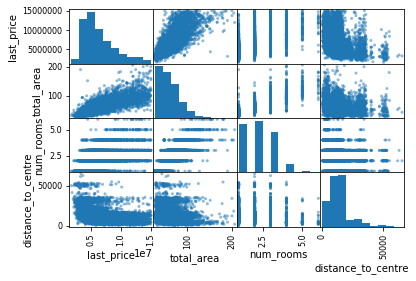

In [571]:
data = df[['last_price', 'total_area', 'num_rooms', 'distance_to_centre']]
pd.plotting.scatter_matrix(data)

Здесь можно сделать вывод даже без отдельных графиков. Цена квартиры явно зависит от общей площади потому что диаграмма рессеивания явно линейная. С дистанцией тоже все очевидно. Как можно заметить у нас чем меньше дальность от центре, тем выше совокупность цен. С количеством комнат чуть сложнее - расмотрим отдеально

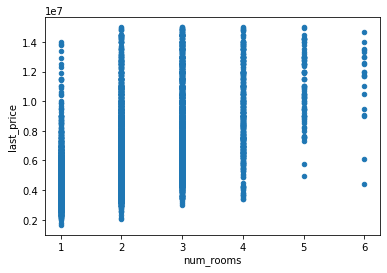

In [582]:
data.plot(kind = 'scatter', x = 'num_rooms', y = 'last_price') # Ответ нет - я бы не сказал что цена зависит от количества комнат

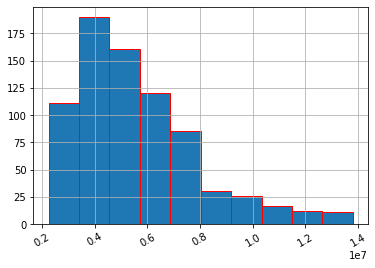

In [589]:
custom_hist(df[df['group_floor'] == 'first']['last_price'])

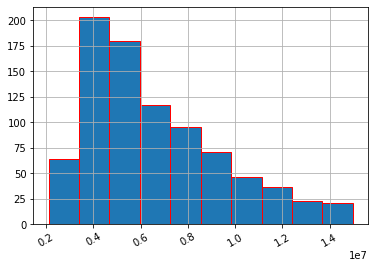

In [594]:
custom_hist(df[df['group_floor'] == 'last']['last_price'])

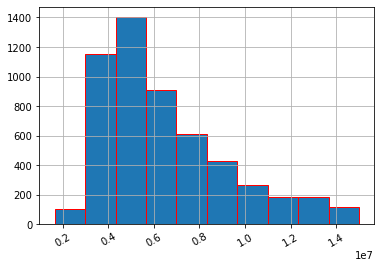

In [596]:
custom_hist(df[df['group_floor'] == 'other']['last_price'])

Можно сделать такой вывод. Что квартиры которые продаются на первом этаже заведемо дешевле порой чем квартиры на любом этаже и последнем.

In [598]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'num_rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'num_balcony',
       'city', 'distance_to_ariport', 'distance_to_centre',
       'count_parks_around_3km', 'parks_nearest', 'count_ponds_around_3km',
       'count_ponds_nearest', 'days_exposition', 'square_meter', 'day',
       'month', 'year', 'living_total', 'kitchen_total', 'group_floor',
       'sm_city'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7e7f8c6d0>,
      dtype=object)

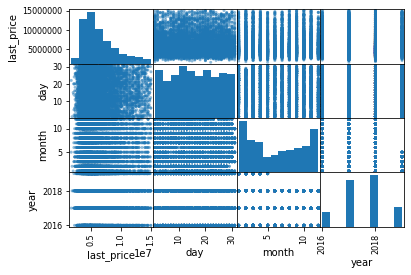

In [602]:
data = df[['last_price','day', 'month', 'year']]
pd.plotting.scatter_matrix(data)

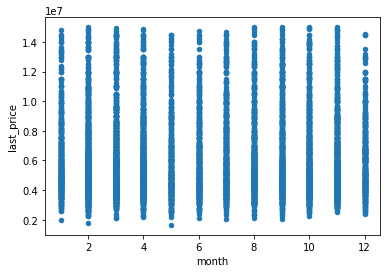

In [604]:
df.plot(kind = 'scatter', x = 'month', y = 'last_price') # Единственное что тут можно мелкое заметить - это что в 12 месяце дорогие квартиры почти не продаются, а так явной закономерности здесь нет

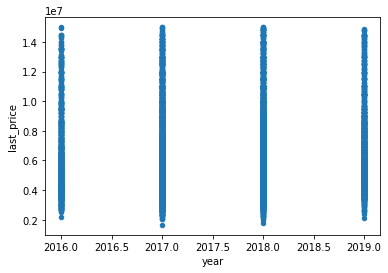

In [609]:
df.plot(kind = 'scatter', y = 'last_price', x = 'year') # Опять же не видно никакой зависимости

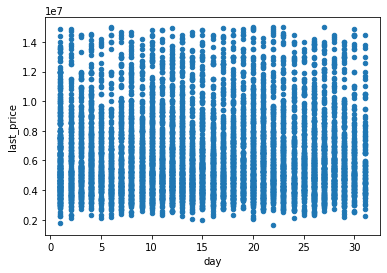

In [612]:
df.plot(kind = 'scatter', x = 'day', y = 'last_price') # Очевидной зависимости опять же нет.

# Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья

In [635]:
data = df.groupby('city', as_index = False).agg({'day' : 'count', 'square_meter' : 'mean'}).head(10).sort_values('square_meter', ascending = False).rename(columns = {'day' : 'counter'})

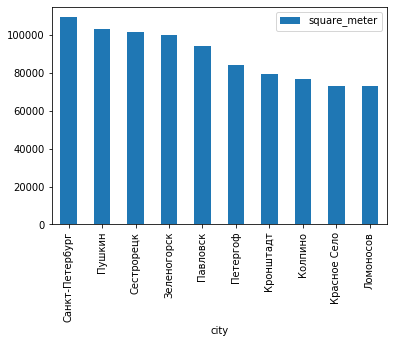

In [636]:
data.plot(kind = 'bar', x = 'city', y = 'square_meter')

Видно что в Санкт-Питербурге и Пушкине наиболее дорогие цены за кв метр, но в Ломоносове, Красном селе и Колпино наиболее низкие цены

# Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [638]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'num_rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'num_balcony',
       'city', 'distance_to_ariport', 'distance_to_centre',
       'count_parks_around_3km', 'parks_nearest', 'count_ponds_around_3km',
       'count_ponds_nearest', 'days_exposition', 'square_meter', 'day',
       'month', 'year', 'living_total', 'kitchen_total', 'group_floor',
       'sm_city'],
      dtype='object')

In [642]:
df['distance_to_centre'].isna().sum()

1

In [652]:
df = df[df['distance_to_centre'].notnull()].reset_index()
df['distance_km'] = df['distance_to_centre'].astype('int') // 1000
df['distance_km'][0:5]

0    16
1     8
2    13
3    33
4    10
Name: distance_km, dtype: int64

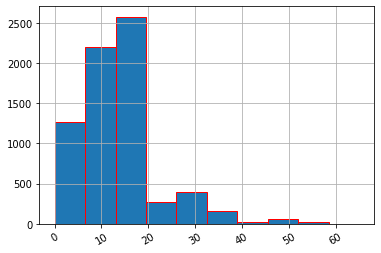

In [654]:
custom_hist(df['distance_km'])

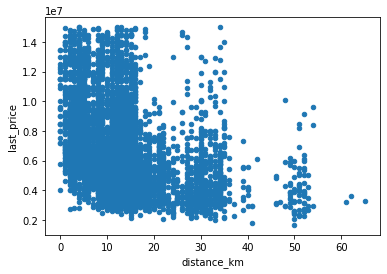

In [656]:
df.plot(kind = 'scatter', x = 'distance_km', y = 'last_price')

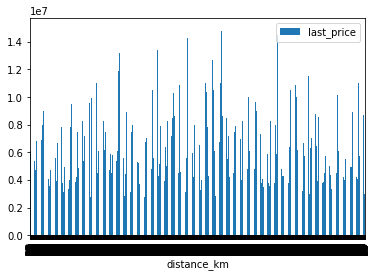

In [657]:
df.plot(kind = 'bar', x = 'distance_km', y = 'last_price')

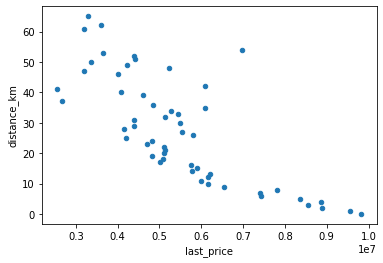

In [664]:
df.groupby('distance_km', as_index = False).agg({'last_price' : 'mean'}).plot(kind = 'scatter', x = 'last_price', y = 'distance_km')

In [666]:
df.head()

,index,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,...,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor,sm_city,distance_km
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,...,NaN,120370.370370,7,3,2019,0.472222,0.231481,other,0.0,16
1,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,121.0,100000.000000,19,6,2018,0.320000,0.410000,other,0.0,8
2,10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,...,137.0,127525.252525,16,11,2017,0.512626,0.214646,other,0.0,13
3,13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,...,366.0,82943.925234,1,7,2017,0.630841,0.121495,last,0.0,33
4,16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,...,397.0,81707.317073,23,11,2017,0.678049,0.109756,first,0.0,10


Думаю примерный центр можно ограничить 10ю киломентрами. Примерно с этого момента наш график имел линейную зависимость.

# Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [678]:
data = df[df['distance_km'] < 10]
data

,index,total_images,last_price,total_area,first_day_exposition,num_rooms,ceiling_height,floors_total,living_area,floor,...,days_exposition,square_meter,day,month,year,living_total,kitchen_total,group_floor,sm_city,distance_km
1,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,...,121.0,100000.000000,19,6,2018,0.320000,0.410000,other,0.0,8
18,52,20,11795000.0,136.00,2017-09-22,6,3.00,2,94.0,2,...,NaN,86727.941176,22,9,2017,0.691176,0.080882,last,0.0,6
20,56,14,4350000.0,41.00,2016-03-28,1,2.80,7,18.1,4,...,152.0,106097.560976,28,3,2016,0.441463,0.270732,other,0.0,9
26,85,13,5200000.0,46.30,2018-11-26,2,3.00,5,27.8,5,...,65.0,112311.015119,26,11,2018,0.600432,0.172786,last,0.0,9
30,103,14,4800000.0,35.00,2018-10-04,1,2.70,25,17.0,9,...,19.0,137142.857143,4,10,2018,0.485714,0.257143,other,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,23644,7,4990000.0,62.50,2018-04-26,2,2.70,4,32.3,4,...,166.0,79840.000000,26,4,2018,0.516800,0.193600,last,0.0,4
6967,23648,14,10100000.0,78.00,2017-05-12,3,3.27,5,48.6,5,...,621.0,129487.179487,12,5,2017,0.623077,0.105128,last,0.0,1
6975,23668,13,6000000.0,47.00,2018-03-16,2,3.00,5,27.0,4,...,157.0,127659.574468,16,3,2018,0.574468,0.191489,other,0.0,9
6979,23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,...,519.0,129903.978052,13,10,2016,0.552812,0.145405,other,0.0,4


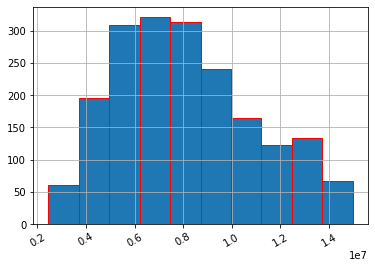

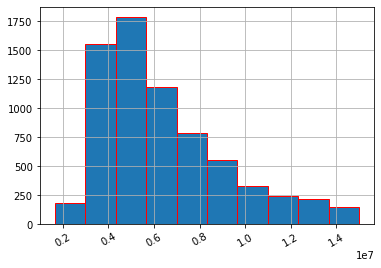

In [679]:
custom_hist(data['last_price'])
custom_hist(df['last_price']) # Разница в цене явно имеется

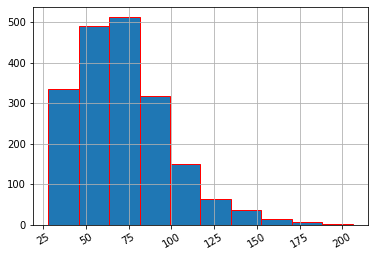

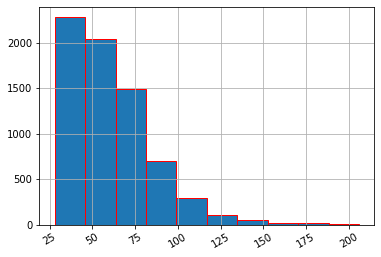

In [681]:
custom_hist(data['total_area'])
custom_hist(df['total_area']) # Также наблдается и разница между площадью

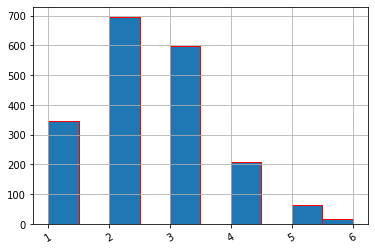

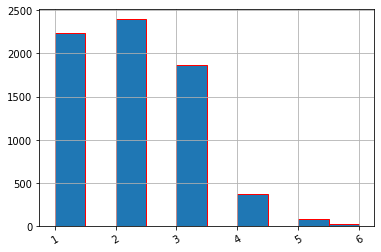

In [683]:
custom_hist(data['num_rooms'])
custom_hist(df['num_rooms']) # В начальном датабейзе логично больше однокомнатных - потом что там и меньше будет цена - докажем ниже
# Разница имеется что явно больше пяти и шестикомнатных квартир

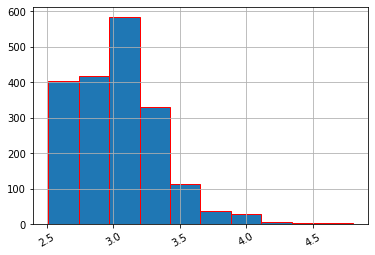

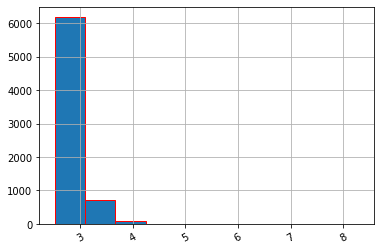

In [686]:
custom_hist(data['ceiling_height'])
custom_hist(df['ceiling_height'])

In [688]:
df.columns

Index(['index', 'total_images', 'last_price', 'total_area',
       'first_day_exposition', 'num_rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'is_studio', 'open_plan',
       'kitchen_area', 'num_balcony', 'city', 'distance_to_ariport',
       'distance_to_centre', 'count_parks_around_3km', 'parks_nearest',
       'count_ponds_around_3km', 'count_ponds_nearest', 'days_exposition',
       'square_meter', 'day', 'month', 'year', 'living_total', 'kitchen_total',
       'group_floor', 'sm_city', 'distance_km'],
      dtype='object')

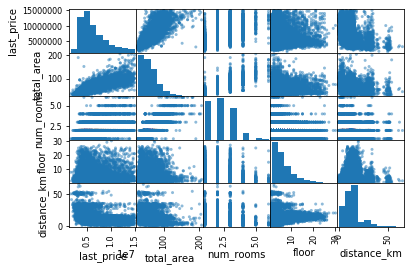

In [692]:
data = df[['last_price', 'total_area', 'num_rooms', 'floor', 'distance_km', 'first_day_exposition']]
pd.plotting.scatter_matrix(data);

Финальный вывод:

    В ходе работы мы смогли проаназилировать квартиры большинства регионов и вывести явные закономерности.
    
    1) Цена квартиры напрямую зависит от площади квартиры
    
    2) Цена квартиры зависит от дистанции до центра
    
    3) Цена квартиры зависит от того на каком этаже она находится (на первом продается хуже чем на любом или последнем)
    
    4) Выявили явные аномалии, которые на самом деле ими не являются и в реальной задаче мы должны были передать эти данные как ЭЛИТНЫЕ квартиры - цена которых на 20 и больше миллионов рублей. Нам пришлось их выкинуть по причине того что они бы просто испортили выводы
    
    5) Также мы выянили что сегмент квартир в центре в принципе продается дороже чем вне центра - казалось это было очевидно, но мы это выяснили только в ходе анализа
    
    6) Выяснили среднее время продажи квартиры
    
Думаю что с теми квартирами за огромные деньги стоило объеденить в отдельную группу и сделать различный анализ - для элитной недвижимости, после чего передать эту информацию команде 